In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Checking Colab Environment**

# Scikit-learn

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Data Analysis

In [ ]:
dataset = datasets.load_digits()

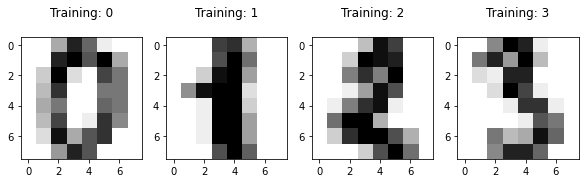

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, dataset.images, dataset.target):
  #ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i\n" % label)

In [ ]:
dataset.images[0]


In [ ]:
dataset['data'].shape, dataset['target'].shape

((1797, 64), (1797,))

In [ ]:
print(dataset.DESCR)

# K-nearest neighbors

In [ ]:
from sklearn import datasets, neighbors, linear_model, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x = dataset.data
y = dataset.target

train_ratio = 0.6
test_ratio = 0.2
valid_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_ratio) # 20% test
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=valid_ratio/(train_ratio+test_ratio)) # 20% valid

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors=25)

# train model using training sets
knn.fit(x_train,y_train)

# predict response for test dataset
y_pred = knn.predict(x_test)
%timeit knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
knn.score(x_test,y_test)

10 loops, best of 5: 32.3 ms per loop
Accuracy: 0.9611111111111111


0.9611111111111111

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(1077, 64)
(360, 64)
(360, 64)


In [ ]:
print(knn.predict(x_valid))


[6 6 4 5 3 3 9 1 2 8 4 7 9 7 9 6 2 3 3 6 8 6 8 1 7 8 3 8 1 0 4 8 9 0 1 8 7
 7 0 3 8 8 8 5 5 9 4 9 5 9 6 9 5 2 4 9 2 3 7 8 8 5 2 6 5 1 6 6 7 7 6 2 4 1
 4 5 8 0 7 9 0 8 5 7 8 1 7 0 2 5 1 3 1 6 4 8 1 0 0 6 9 5 5 0 7 5 5 2 4 2 0
 5 1 0 3 4 2 2 9 7 7 5 9 4 9 7 7 0 4 4 4 3 2 2 5 8 8 6 3 6 1 7 7 1 7 2 9 0
 3 5 7 9 0 6 9 2 2 4 4 6 1 9 7 7 1 2 7 3 4 9 8 2 9 0 8 8 4 4 2 6 0 6 2 1 0
 1 8 4 4 3 2 7 3 5 1 5 1 0 5 2 2 7 1 6 0 6 7 6 7 2 3 5 5 4 0 1 8 8 9 3 3 7
 4 3 7 2 4 4 3 5 9 6 4 7 0 0 3 0 1 9 8 3 9 7 0 1 6 3 0 1 1 0 1 0 6 6 9 2 1
 6 5 8 3 4 8 3 1 5 6 3 6 4 8 2 4 4 4 8 4 4 7 1 3 7 2 0 8 6 8 9 6 7 0 8 4 6
 3 9 1 3 2 3 7 3 6 2 7 1 2 7 4 5 0 4 5 4 5 5 1 8 8 0 5 8 3 4 5 3 3 2 7 8 6
 0 6 4 4 0 3 7 3 4 3 9 6 3 9 8 5 6 0 4 1 5 4 0 7 0 5 4]


In [ ]:
print(y_valid)

[6 8 4 5 3 3 9 1 2 8 4 7 9 7 9 6 3 3 8 6 8 6 8 1 7 8 3 8 8 0 4 8 9 0 1 8 7
 7 0 3 8 8 8 5 5 9 4 9 5 9 6 9 5 2 4 9 2 3 7 8 8 5 2 6 5 1 6 6 7 7 6 2 4 1
 4 5 8 0 7 9 0 8 5 7 2 1 3 0 2 5 1 3 1 6 4 8 1 0 0 6 9 5 5 0 7 5 5 2 4 2 0
 5 1 0 3 4 2 2 9 3 7 5 9 4 9 7 7 0 4 4 4 3 2 2 5 3 8 6 3 6 1 7 7 1 7 2 9 0
 3 5 7 9 0 6 9 2 2 4 4 6 1 9 7 7 1 2 7 3 4 9 2 2 9 0 8 8 4 4 2 6 0 6 2 1 0
 1 8 4 4 9 2 7 3 5 1 5 1 0 5 2 2 7 1 6 0 6 7 6 7 1 3 5 5 4 0 1 2 8 9 3 3 7
 4 3 9 2 4 4 3 5 9 6 4 7 0 0 3 0 1 9 8 3 9 7 0 1 6 3 0 1 1 0 1 0 6 6 9 2 1
 6 5 8 3 4 8 3 1 5 6 3 6 4 8 2 4 4 4 8 4 4 7 1 3 7 2 0 8 6 8 9 6 7 0 8 4 6
 3 9 1 3 2 3 7 3 6 2 7 1 2 7 4 5 0 4 5 4 5 5 1 8 8 0 5 8 3 4 5 3 3 2 7 8 6
 0 6 4 4 0 3 7 3 4 3 9 6 3 9 8 5 6 0 4 1 5 4 0 9 0 5 4]


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(random_state=0)

In [ ]:
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
%timeit log.predict(x_test)

10000 loops, best of 5: 162 µs per loop


In [ ]:
print(log.predict(x_valid))

[6 8 4 5 3 3 9 1 2 8 4 7 9 7 9 6 8 3 8 6 5 6 8 1 7 8 3 8 8 0 4 4 9 0 1 8 7
 7 0 3 8 8 8 5 5 9 4 9 5 9 6 9 5 2 4 9 2 3 7 8 8 5 2 6 5 1 6 6 7 7 6 2 4 1
 4 5 8 0 7 9 0 8 5 7 2 1 2 0 2 5 1 3 1 6 4 8 1 0 0 6 9 5 5 0 7 5 5 2 4 2 0
 2 1 0 3 4 2 2 9 3 7 5 9 4 9 7 7 0 4 4 4 3 2 2 5 3 8 6 3 6 1 7 7 1 7 2 9 0
 3 5 7 9 0 6 9 2 2 4 4 6 1 9 7 7 1 2 7 3 4 9 2 2 9 0 8 8 4 4 2 6 0 6 2 1 0
 1 8 4 4 8 2 7 3 5 1 5 1 0 5 2 2 7 1 6 0 6 7 6 7 1 3 5 5 4 0 1 2 8 9 3 3 7
 4 3 9 2 4 4 5 5 9 6 4 7 0 0 3 0 1 9 8 3 9 7 0 1 6 3 0 1 1 0 1 0 6 6 9 2 1
 6 5 8 3 4 8 3 1 5 6 3 6 4 8 2 4 4 4 8 4 4 8 1 3 7 2 0 8 6 8 9 6 7 0 8 4 6
 3 9 1 3 2 3 7 3 6 2 7 1 2 7 4 5 0 4 5 4 5 5 1 8 8 0 5 8 3 4 5 3 3 2 7 8 6
 0 6 4 4 0 3 7 3 4 3 9 6 3 9 8 5 6 0 4 1 5 4 0 9 0 9 4]


In [ ]:
log.score(x_test,y_test) # mean accuracy on given test data and labels

0.9805555555555555

In [ ]:
metrics.accuracy_score(y_test, log.predict(x_test))

0.9805555555555555

# SVM

In [ ]:
from sklearn import svm

In [ ]:
clf1 = svm.SVC()
clf1.fit(x_train,y_train)
%timeit clf1.predict(x_test)
clf1.score(x_test,y_test)

10 loops, best of 5: 21.7 ms per loop


0.9805555555555555

In [ ]:
#rbf_svc = svm.SVC(kernel='rbf')

svc = svm.SVC(gamma=0.001, C=100.)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=100.0, gamma=0.001)

In [ ]:
%timeit svc.predict(x_test)

10 loops, best of 5: 25.1 ms per loop


In [ ]:
svc.score(x_test,y_test)

0.9805555555555555

In [ ]:
def my_kernel(X,Y):
  return np.dot(X, Y.T)

In [ ]:
svc_kernel = svm.SVC(kernel=my_kernel)

In [ ]:
svc_kernel.fit(x_train,y_train)
%timeit svc_kernel.predict(x_test)
svc_kernel.score(x_test,y_test)

100 loops, best of 5: 5.32 ms per loop


0.9861111111111112

In [ ]:
print(svc_kernel.predict(x_valid))

[6 8 4 5 3 3 9 1 2 8 4 7 9 7 9 6 3 3 8 6 5 6 8 1 7 8 3 8 8 0 4 1 9 0 1 8 7
 7 0 3 8 8 8 5 5 9 4 9 5 9 6 9 5 2 4 9 2 3 7 8 8 5 2 6 5 1 6 6 7 7 6 2 4 1
 4 5 8 0 7 9 0 8 5 7 2 1 3 0 2 5 1 3 1 6 4 8 1 0 0 6 9 5 5 0 7 5 5 2 4 2 0
 5 1 0 3 4 2 2 9 3 7 5 9 4 9 7 7 0 4 4 4 3 2 2 5 3 8 6 3 6 1 7 7 1 7 2 9 0
 3 5 7 9 0 6 9 2 2 4 4 6 1 9 7 7 1 2 7 3 4 9 2 2 9 0 8 1 4 4 2 6 0 6 2 1 0
 1 8 4 4 8 2 7 3 5 1 5 1 0 5 2 2 7 1 6 0 6 7 6 7 1 3 5 5 4 0 1 2 8 9 3 3 7
 4 3 9 2 4 4 5 5 9 6 4 7 0 0 3 0 1 9 8 3 9 7 0 1 6 3 0 1 1 0 1 0 6 6 9 2 1
 6 5 8 3 4 8 3 1 5 6 3 6 4 8 2 4 4 4 8 4 4 7 1 3 7 2 0 8 6 8 9 6 7 0 8 4 6
 3 9 1 3 2 3 7 3 6 2 7 1 2 7 4 5 0 4 5 4 5 5 1 8 8 0 5 8 3 4 5 3 3 2 7 8 6
 0 6 4 4 0 3 7 3 4 3 9 6 3 9 8 5 6 0 4 1 5 4 0 9 0 5 4]


# FDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) 

fda = LinearDiscriminantAnalysis()
fda.fit(x_train, y_train)
%timeit fda.predict(x_test)
fda.score(x_test,y_test)

1000 loops, best of 5: 171 µs per loop


0.9416666666666667

In [ ]:
print(fda.predict(x_valid))

[6 8 4 5 3 3 9 1 2 8 4 9 9 7 9 6 8 3 8 6 5 6 8 1 7 8 3 8 1 0 4 8 9 0 1 8 7
 7 0 3 8 8 8 5 5 9 4 9 5 9 6 9 5 2 4 9 2 3 7 8 8 5 2 6 5 1 6 6 7 7 6 2 4 1
 7 5 8 0 7 9 0 8 5 7 2 1 3 0 2 5 1 3 1 6 4 8 1 0 0 6 9 5 5 0 7 5 5 2 4 2 0
 5 1 0 3 4 2 2 9 3 7 5 9 4 9 9 7 0 4 4 4 3 2 2 5 3 8 6 3 6 1 7 7 1 7 2 9 0
 3 5 7 9 0 6 9 2 2 4 4 6 1 9 7 7 1 2 7 3 4 9 2 2 9 0 8 1 4 4 2 6 0 6 2 1 0
 1 8 4 4 8 2 7 3 5 1 5 1 0 5 2 2 7 1 6 0 6 7 6 7 1 3 5 5 4 0 1 2 8 9 3 3 7
 4 3 9 2 4 9 5 5 9 6 4 7 0 0 3 0 1 9 8 3 9 7 0 1 6 3 0 9 1 0 1 0 6 6 9 2 1
 6 5 9 3 4 8 3 1 5 6 3 6 4 8 2 4 4 4 8 4 4 9 1 3 7 2 0 8 6 8 9 6 7 0 3 4 6
 3 9 1 3 2 3 7 3 6 2 7 1 2 7 4 5 0 4 5 4 5 5 1 8 8 0 5 8 3 4 5 3 3 2 7 8 6
 0 6 4 4 0 3 7 3 4 3 9 6 3 9 8 5 6 0 4 1 5 4 0 7 0 9 4]


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) 

linear = LinearRegression()
linear.fit(x_train, y_train)
%timeit linear.predict(x_test)
linear.score(x_test,y_test)


10000 loops, best of 5: 173 µs per loop


0.5890654260856105

In [ ]:
print(linear.predict(x_valid))

[ 5.80324265  6.01471146  3.00475849  3.99066501  5.08915358  4.82641483
  5.25858008  3.35256813  3.10531222  7.67578     2.96090869  6.99266838
  7.16332683  6.18271075  7.73867754  3.75934915  5.62338753  4.25833751
  6.28350303  5.21413009  5.15328173  5.77122187  5.99493203  3.25768394
  5.65401568  7.85697344  4.81404866  8.42062743  5.83510027  2.2695018
  3.90205472  5.19894434  6.17526982  1.66806545  3.77207812  7.04511351
  5.74250438  6.56056211  1.58999675  6.03780477  7.60242166  7.25754811
  7.35913214  4.67378954  3.91228954  6.61979288  3.42892237  4.53309843
  4.30577023  9.08260263  3.79156095  6.16334942  6.62477737  0.75733169
  5.50490099  7.67233693 -0.10635262  7.17787473  6.46175791  7.9099936
  6.84241242  4.47952645  1.96215422  3.73740654  8.42470857  2.27420046
  4.64849145  4.43899198  5.84867417  7.35818681  6.46904535  2.70936259
  2.59142795  2.77620808  6.68149601 -1.12965062  6.74556199  3.47087458
  7.40565631  7.34048822  3.38194723  7.36936726  2.0

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#stochastic gradient descent
mlp1 = MLPClassifier(solver='sgd', hidden_layer_sizes=(10,), random_state=1)

mlp1.fit(x_train,y_train)
%timeit mlp1.predict(x_test)
mlp1.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1000 loops, best of 5: 440 µs per loop


0.9111111111111111

In [ ]:
print(mlp1.predict(x_valid))

[6 1 4 5 8 3 9 1 2 8 4 2 9 7 9 6 8 3 8 6 3 6 8 1 7 8 8 8 1 0 4 8 9 0 1 8 7
 7 0 3 8 8 8 5 5 9 4 9 5 9 6 9 5 2 4 9 2 3 7 8 8 5 2 6 5 1 6 6 7 7 6 2 4 1
 4 5 8 0 7 9 0 8 5 7 2 1 7 0 2 5 1 3 7 6 4 8 1 0 0 6 9 5 5 0 7 5 5 2 4 6 0
 5 1 0 3 4 2 2 9 3 7 5 9 4 9 3 7 0 4 4 4 3 2 2 5 3 8 6 3 6 1 7 7 1 7 2 9 0
 3 5 7 9 0 6 9 2 2 4 4 6 1 9 7 7 1 2 7 3 4 9 2 2 9 0 8 8 4 4 2 6 0 6 2 1 0
 1 8 4 4 8 2 7 3 5 1 5 1 0 5 2 2 7 8 6 0 6 7 6 7 8 3 5 5 4 0 8 2 1 9 3 3 7
 4 3 3 2 4 8 5 5 9 6 4 7 0 0 3 0 1 9 1 3 9 7 0 1 6 3 0 8 1 0 1 0 6 6 9 2 1
 6 5 8 3 4 9 3 1 5 6 3 6 4 9 2 4 4 4 8 4 4 2 1 3 7 2 0 8 6 8 9 6 7 0 3 4 6
 3 3 1 3 2 3 7 3 6 2 7 1 2 7 4 5 0 4 5 4 5 5 1 9 8 0 5 8 3 4 5 3 3 2 7 8 6
 0 6 4 4 0 3 7 3 4 3 8 6 3 9 8 5 6 0 4 4 5 4 0 3 0 9 4]


In [ ]:
mlp2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=1)

mlp2.fit(x_train,y_train)
%timeit mlp2.predict(x_test)
mlp2.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The slowest run took 4.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 412 µs per loop


0.6916666666666667